In [134]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [135]:
#Bring in the predictions
import joblib
with open('models/recession_probs.pkl', 'rb') as f:
    y_pred = joblib.load(f)

In [136]:
dji = yf.Ticker("^DJI")

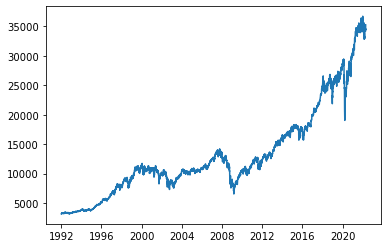

In [137]:
hist = dji.history(period="max")
plt.plot(hist.index,hist['Open']);

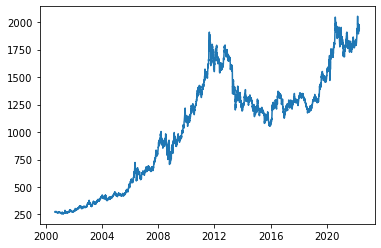

In [138]:
gold = yf.Ticker("GC=F")
gold_hist = gold.history(period='max')
plt.plot(gold_hist.index,gold_hist['Open']);

In [167]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0,0
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0,0
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0,0
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0,0
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,29040000,0,0
...,...,...,...,...,...,...,...
2022-04-14,34628.460938,34889.171875,34437.500000,34451.230469,353680000,0,0
2022-04-18,34411.488281,34618.289062,34279.078125,34411.691406,264110000,0,0
2022-04-19,34394.621094,34983.109375,34394.621094,34911.199219,296350000,0,0


In [214]:
from datetime import datetime as dt
import datetime

funds = 100000
split = {'aggressive': 0.5, 'conservative': 0.5}
portfolio = {'dow jones': 0, 'gold': 0}
first_day = dt.fromisoformat('2002-01-02').date()
funds_history = []
time_history = []
for day in range(7000):

    #Determine what day it is
    today = dt.fromisoformat((first_day + datetime.timedelta(days = day)).isoformat())


    
    #Determine what split to use in the portfolio based on the predicted model
    if today in y_pred.index:
        split['aggressive'] = 1 - y_pred.loc[today,:][0]
        split['conservative'] = y_pred.loc[today,:][0]

    #Invest on first day
    if today == dt.fromisoformat((first_day + datetime.timedelta(days = 1)).isoformat()):
        funds = 100000
        portfolio['dow jones'] = (split['aggressive'] * funds) / hist['Open'].loc[today]
        print(portfolio['dow jones'])
        portfolio['gold'] = (split['conservative'] * funds) / gold_hist['Open'].loc[today]
        print(portfolio['gold'])
    #Check if markets are open
    if today.isoweekday() in [6,7]:
        continue;

    try:
        hist['Open'].loc[today]
        gold_hist['Open'].loc[today]
        time_history.append(today)
    except:
        continue;
    
    #Sell all assets at their opening value
    funds = portfolio['dow jones'] * hist['Open'].loc[today] + portfolio['gold'] * gold_hist['Open'].loc[today]
    funds_history.append(funds)

    #Buy new assets as determined split
    portfolio['dow jones'] = (split['aggressive'] * funds) / hist['Open'].loc[today]
    portfolio['gold'] = (split['conservative'] * funds) / gold_hist['Open'].loc[today]


4.963330968965319
179.7268073546702


In [215]:
from datetime import datetime as dt
import datetime

funds = 100000
split = {'aggressive': 1, 'conservative': 0}
portfolio = {'dow jones': 0, 'gold': 0}
first_day = dt.fromisoformat('2002-01-02').date()
dow_history = []
dow_time_history = []
for day in range(7000):

    #Determine what day it is
    today = dt.fromisoformat((first_day + datetime.timedelta(days = day)).isoformat())


    
    #Determine what split to use in the portfolio based on the predicted model
    if today in y_pred.index:
        split['aggressive'] = 1

    #Invest on first day
    if today == dt.fromisoformat((first_day + datetime.timedelta(days = 1)).isoformat()):
        funds = 100000
        portfolio['dow jones'] = (split['aggressive'] * funds) / hist['Open'].loc[today]
        print(portfolio['dow jones'])
        portfolio['gold'] = 0
    
    #Check if markets are open
    if today.isoweekday() in [6,7]:
        continue;

    try:
        hist['Open'].loc[today]
        gold_hist['Open'].loc[today]
        dow_time_history.append(today)
    except:
        continue;
    
    #Sell all assets at their opening value
    funds = portfolio['dow jones'] * hist['Open'].loc[today]
    dow_history.append(funds)

    #Buy new assets as determined split
    portfolio['dow jones'] = (split['aggressive'] * funds) / hist['Open'].loc[today]


9.926661937930637


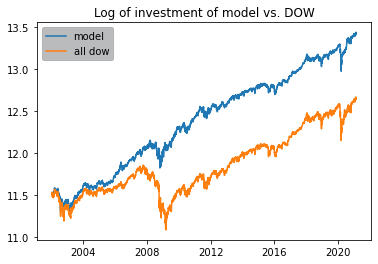

In [247]:
import matplotlib.pyplot as plt

import numpy as np

fig, ax = plt.subplots()

plt.plot(time_history[1:],np.log(funds_history[1:]), label = 'model')
plt.plot(dow_time_history[1:],np.log(dow_history[1:]), label = 'all dow')
plt.title('Log of investment of model vs. DOW')
legend = ax.legend()
frame = legend.get_frame()
frame.set_color('#a8aaad')
plt.savefig('figures/StockSimLog.png', transparent=True, dpi = 800, bbox_inches='tight');

/var/folders/9z/tw9j8p_n7w3fdl6dpkycs1p00000gn/T/ipykernel_26193/1763558841.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels)


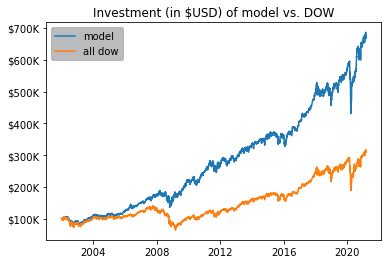

In [246]:
fig, ax = plt.subplots()

import matplotlib.ticker as mtick
ax.plot(time_history[1:],funds_history[1:], label = 'model')
ax.plot(dow_time_history[1:],dow_history[1:], label = 'all dow')

# getting the array of values of y-axis
ticks = ax.get_yticks()
# formatted the values into strings beginning with dollar sign
new_labels = [f'${int(amt/1000)}K' for amt in ticks]
# Set the new labels
ax.set_yticklabels(new_labels)

plt.title('Investment (in $USD) of model vs. DOW')
legend = ax.legend()
frame = legend.get_frame()
frame.set_color('#a8aaad')
plt.savefig('figures/StockSim.png', transparent=True, dpi = 800, bbox_inches='tight');

In [143]:
def stockSim(initial_funds = 100000, 
             initial_date = dt.fromisoformat('2001-01-02'),
             final_date = dt.fromisoformat('1992-01-02'),
             predictions = y_pred,
             aggressive = hist,
             conservative = gold_hist):
    """
    Runs a simulation of the market based on predictions
    """
    
    


    print('hahaha')
    return None

In [144]:
stockSim()

hahaha
